In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import power_transform
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,accuracy_score
from sklearn.metrics import classification_report

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Exploratory Data Analysis

## checking nulls

In [4]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Checking data types

In [5]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## Treating nulls

In [3]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])

In [4]:
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [5]:
df['Married']=df['Married'].fillna(df['Married'].mode()[0])

In [10]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Analysing relationship between features and label

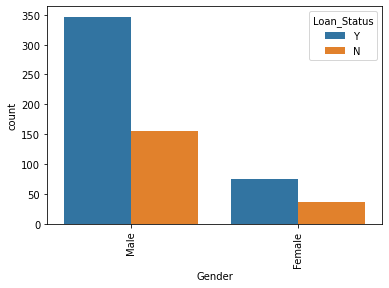

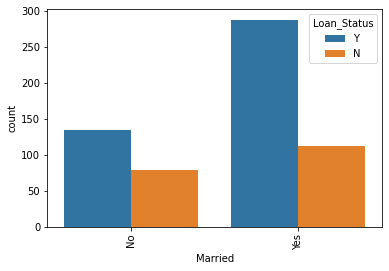

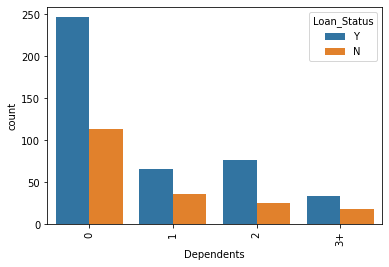

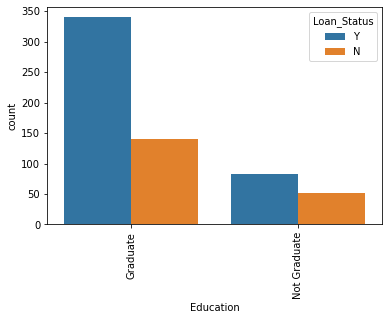

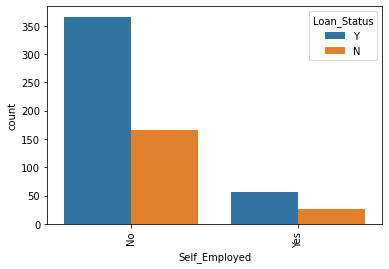

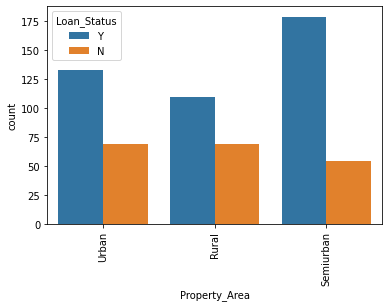

In [11]:
category=['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
#Plotting count plot for each feature
for i in category:
    a=sns.countplot(x=df[i],hue=df['Loan_Status'],data=df)
    plt.xlabel(i)
    plt.xticks(rotation=90)
    plt.show()

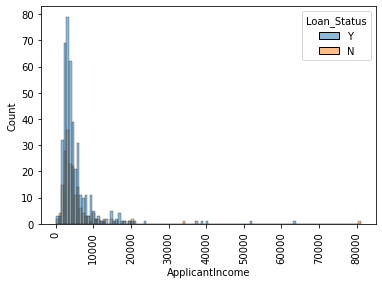

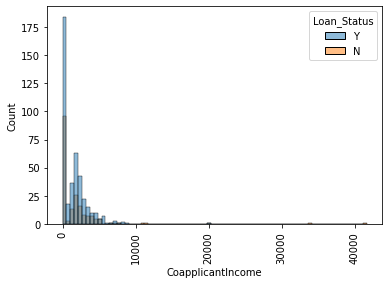

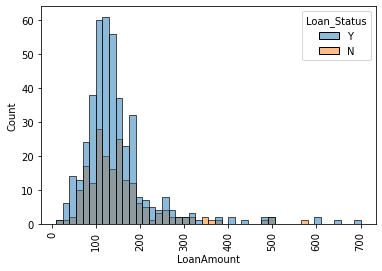

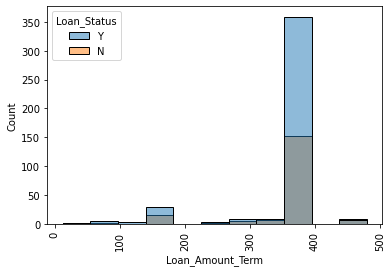

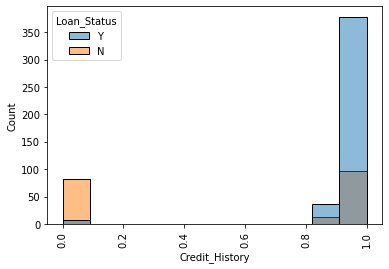

In [12]:
col=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
for i in col:
    a=sns.histplot(x=df[i],hue=df['Loan_Status'],data=df)
    plt.xlabel(i)
    plt.xticks(rotation=90)
    plt.show()

## Encoding

In [6]:
#Using ordinal encoder
oe=OrdinalEncoder()
df1=oe.fit_transform(df[['Gender']])
df['Gender']=df1
df2=oe.fit_transform(df[['Married']])
df['Married']=df2
df3=oe.fit_transform(df[['Dependents']])
df['Dependents']=df3
df1=oe.fit_transform(df[['Education']])
df['Education']=df1
df2=oe.fit_transform(df[['Self_Employed']])
df['Self_Employed']=df2
df1=oe.fit_transform(df[['Property_Area']])
df['Property_Area']=df1
df1=oe.fit_transform(df[['Loan_ID']])
df['Loan_ID']=df1

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,Y
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,N
2,2.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,Y
3,3.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,Y
4,4.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,Y


## Label Encoding

In [7]:
le=LabelEncoder()
df1=le.fit_transform(df[['Loan_Status']])
df['Loan_Status']=df1
df.head(20)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.000000,2.0,1
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.000000,0.0,0
2,2.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.000000,2.0,1
3,3.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.000000,2.0,1
4,4.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.000000,2.0,1
5,5.0,1.0,1.0,2.0,0.0,1.0,5417,4196.0,267.000000,360.0,1.000000,2.0,1
6,6.0,1.0,1.0,0.0,1.0,0.0,2333,1516.0,95.000000,360.0,1.000000,2.0,1
7,7.0,1.0,1.0,3.0,0.0,0.0,3036,2504.0,158.000000,360.0,0.000000,1.0,0
8,8.0,1.0,1.0,2.0,0.0,0.0,4006,1526.0,168.000000,360.0,1.000000,2.0,1
9,9.0,1.0,1.0,1.0,0.0,0.0,12841,10968.0,349.000000,360.0,1.000000,1.0,0


## Describing the data

In [16]:
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.037459,0.687296
std,177.390811,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


<AxesSubplot:>

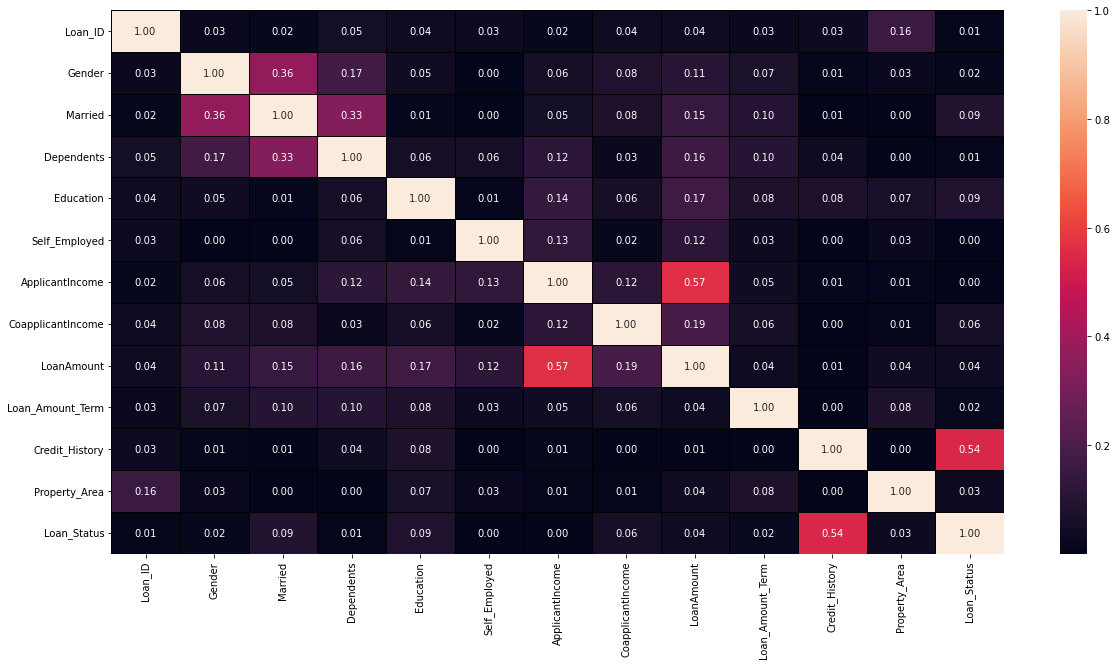

In [17]:
# Plotting heat map for better analysis
plt.figure(figsize=(20,10))
sns.heatmap(df.corr().abs(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')

Observation: Multicollinearity could exists as per above heatmap. So we need to check VIF score once.

## VIF

In [18]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
vif['features']=df.columns
vif

,vif,features
0,3.775999,Loan_ID
1,6.022065,Gender
2,3.698536,Married
3,1.799741,Dependents
4,1.321371,Education
5,1.178468,Self_Employed
6,2.892357,ApplicantIncome
7,1.492461,CoapplicantIncome
8,6.876728,LoanAmount
9,11.707767,Loan_Amount_Term


## Checking Outliers

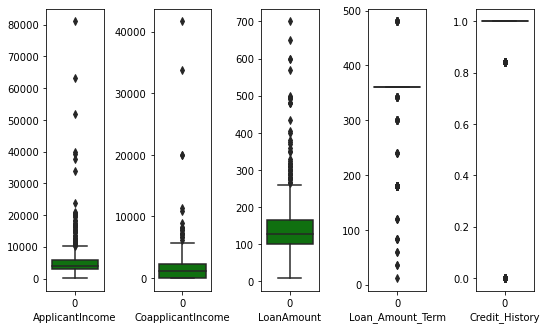

In [23]:
col=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
plt.figure(figsize=(30,90))
for i in range(len(col)):
    plt.subplot(20,20,i+1)
    sns.boxplot(data=df[col[i]],color='green',orient='v')
    plt.xlabel(col[i],fontsize=10)
    plt.tight_layout()

Observation: We could see outliers in all the continuous features

## Checking skewness

In [24]:
df.skew()

Loan_ID              0.000000
Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

Observation: Considering the best range of skewness as -0.5 to 0.5, we could observe that ApplicantIncome,CoapplicantIncome,
    LoanAmount,Loan_Amount_Term and credit_History are skewed.

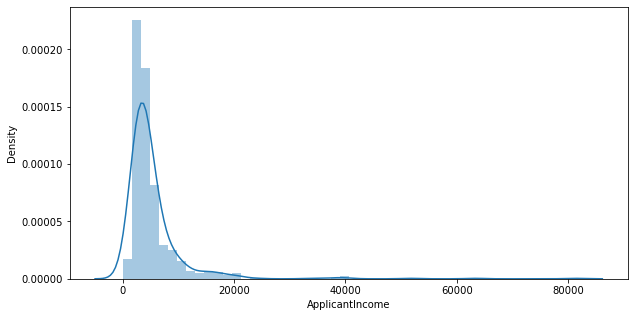

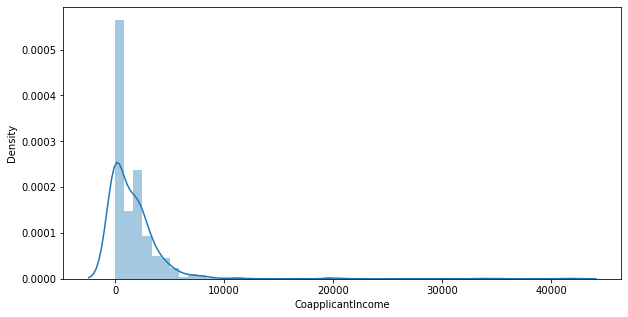

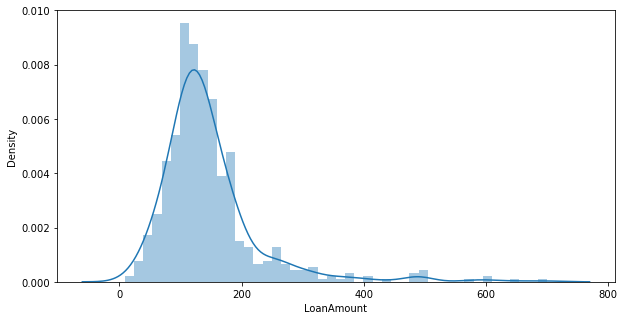

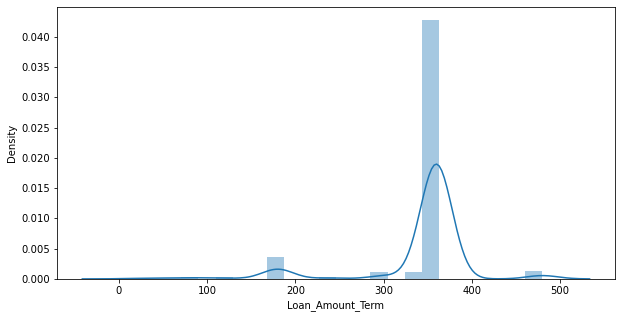

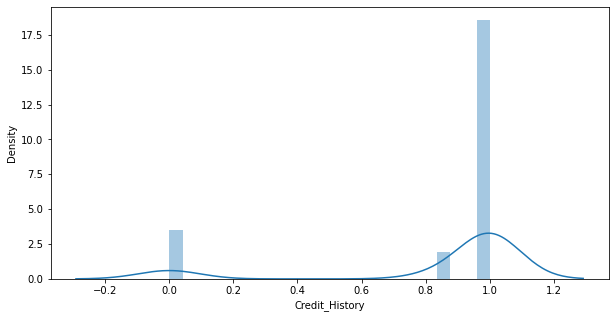

In [26]:
# Ploting Distribution plot to cross check skewness
import warnings
warnings.filterwarnings('ignore')

# for feature Length
for i in range(len(col)):
    plt.figure(figsize=(10,5))
    sns.distplot(df[col[i]])
    plt.xlabel(col[i],fontsize=10)

Our skewness observation is correct.

Observation: We could observe that the vif score of Loan_Amount_Term is >10 thus causing multicollinearity, it also has 
    lot of outliers and is also skewed so we would drop this feature as it is only 2% related with Loan_Status.

In [8]:
df=df.drop(['Loan_Amount_Term'],axis=1)

## Treating Outliers

In [9]:
#Getting sure of outliers using z score
x=df.drop(['Gender','Married','Dependents','Education','Self_Employed','Property_Area'],axis=1)
z=np.abs(zscore(x))
i=np.where(z>3)
print("Outliers index-\n",set(i[0]))
print("\n\nNumber of rows to be eliminated-\n",len(set(i[0])))

Outliers index-
 {130, 9, 523, 525, 402, 278, 409, 155, 417, 171, 432, 177, 561, 308, 183, 185, 443, 581, 333, 600, 604, 487, 369, 506, 126}


Number of rows to be eliminated-
 25


In [11]:
#Calculating Data Loss
loss=((614-25)/614)*100
print("The data loss-",100-loss,"%")

The data loss- 4.0716612377850225 %


We could bear with 4% data loss as we have huge dataset, so lets drop these rows.

In [12]:
#removing rows with outliers
df=df.drop(x.index[i[0]])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,1.0,2.0,1
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,1.0,0.0,0
2,2.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,1.0,2.0,1
3,3.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,1.0,2.0,1
4,4.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,1.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,1.0,0.0,1
610,610.0,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,1.0,0.0,1
611,611.0,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,1.0,2.0,1
612,612.0,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,1.0,2.0,1


In [13]:
#Checking skewness again
df.skew()

Loan_ID              0.011067
Gender              -1.626104
Married             -0.631755
Dependents           1.038787
Education            1.303332
Self_Employed        2.218831
ApplicantIncome      2.164762
CoapplicantIncome    1.353191
LoanAmount           1.076221
Credit_History      -1.953298
Property_Area       -0.063183
Loan_Status         -0.828815
dtype: float64

Still skewness exists so lets treat it.

## Checking dataset is balanced or notm

In [14]:
df['Loan_Status'].value_counts()

1    407
0    182
Name: Loan_Status, dtype: int64

Observation: Data is imbalanced so we have to treat it now.

## Data Balancing

In [15]:
from sklearn.utils import resample

NoStatus=df[df.Loan_Status==0]
YesStatus=df[df.Loan_Status==1]
No_upsampled=resample(NoStatus,replace=True,n_samples=len(YesStatus),random_state=27)
df_up=pd.concat([YesStatus,No_upsampled])
df_up['Loan_Status'].value_counts()

1    407
0    407
Name: Loan_Status, dtype: int64

## Treating Skewness

In [16]:
x=df_up.drop(['Loan_Status'],axis=1)

In [17]:
#using yeo-johnson transformation
x=power_transform(x,method='yeo-johnson')
x

array([[-2.19276464,  0.50038388, -1.2884606 , ...,  0.26315815,
         0.59611265,  1.17147287],
       [-2.13655114,  0.50038388,  0.77611997, ..., -1.39723825,
         0.59611265,  1.17147287],
       [-2.11360738,  0.50038388,  0.77611997, ..., -0.20623603,
         0.59611265,  1.17147287],
       ...,
       [-0.76505075, -1.99846567, -1.2884606 , ...,  1.42468944,
         0.59611265, -1.33072239],
       [ 1.27223597, -1.99846567, -1.2884606 , ..., -0.62349114,
        -1.83293281,  0.0052363 ],
       [ 0.68628119,  0.50038388,  0.77611997, ...,  1.33177562,
        -1.83293281, -1.33072239]])

In [18]:
y=df_up['Loan_Status']

## Standardisation of data

In [19]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[-2.19276464,  0.50038388, -1.2884606 , ...,  0.26315815,
         0.59611265,  1.17147287],
       [-2.13655114,  0.50038388,  0.77611997, ..., -1.39723825,
         0.59611265,  1.17147287],
       [-2.11360738,  0.50038388,  0.77611997, ..., -0.20623603,
         0.59611265,  1.17147287],
       ...,
       [-0.76505075, -1.99846567, -1.2884606 , ...,  1.42468944,
         0.59611265, -1.33072239],
       [ 1.27223597, -1.99846567, -1.2884606 , ..., -0.62349114,
        -1.83293281,  0.0052363 ],
       [ 0.68628119,  0.50038388,  0.77611997, ...,  1.33177562,
        -1.83293281, -1.33072239]])

## Train test split

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
max_ac=0
randomState=0
lr=LogisticRegression()
for i in range(500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("\n\nAt random state:",i)
        print("\nTrain Accuracy- ",round(accuracy_score(y_train,pred_train)*100,1))
        print("\nTest Accuracy- ",round(accuracy_score(y_test,pred_test)*100,1))
        if round(accuracy_score(y_test,pred_test)*100,1)>max_ac:
            randomState=i
            max_ac=round(accuracy_score(y_test,pred_test)*100,1)
print("\n\n Best accuracy at random state-",randomState)



At random state: 447

Train Accuracy-  69.9

Test Accuracy-  69.9


 Best accuracy at random state- 447


## Logistic Regression

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=200,test_size=0.20)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
train_accuracy=round(accuracy_score(y_train,pred_train)*100,1)
test_accuracy=round(accuracy_score(y_test,pred_test)*100,1)
print("\ntrain accuracy-",train_accuracy)
print("\ntest accuracy-",test_accuracy)


train accuracy- 70.8

test accuracy- 76.1


## Cross Validation Score

In [22]:
for i in range(4,20):
    cv_score=cross_val_score(lr,x,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",test_accuracy)



At cv- 4

 cross validation score is- 59.10062300782381

 Accuracy score is- 76.1


At cv- 5

 cross validation score is- 62.28660152995531

 Accuracy score is- 76.1


At cv- 6

 cross validation score is- 64.50617283950618

 Accuracy score is- 76.1


At cv- 7

 cross validation score is- 66.72350637867879

 Accuracy score is- 76.1


At cv- 8

 cross validation score is- 67.32915938652688

 Accuracy score is- 76.1


At cv- 9

 cross validation score is- 67.21611721611721

 Accuracy score is- 76.1


At cv- 10

 cross validation score is- 67.57904245709125

 Accuracy score is- 76.1


At cv- 11

 cross validation score is- 68.7960687960688

 Accuracy score is- 76.1


At cv- 12

 cross validation score is- 68.80121451565701

 Accuracy score is- 76.1


At cv- 13

 cross validation score is- 68.56118791602664

 Accuracy score is- 76.1


At cv- 14

 cross validation score is- 69.303665358604

 Accuracy score is- 76.1


At cv- 15

 cross validation score is- 68.80583613916949

 Accuracy scor

So we are getting the least difference between cross_val_score and accuracy score at cv=19

In [23]:
cv_score_best=cross_val_score(lr,x,y,cv=19).mean()*100
print("cross validation score is-",cv_score_best)
print("accuracy score for linear regression model is-",test_accuracy)

cross validation score is- 69.17001806842687
accuracy score for linear regression model is- 76.1


## Confusion Matrix

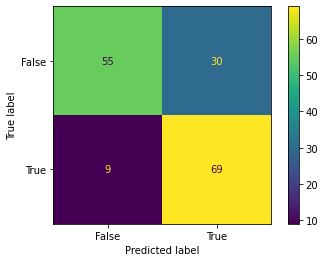

In [24]:
confusion_matrix = metrics.confusion_matrix(y_test, pred_test)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

## AUC-ROC Curve

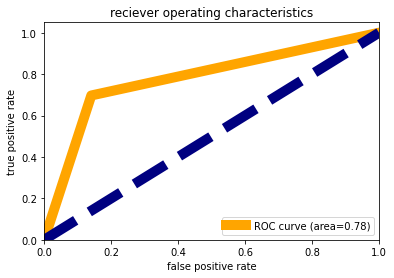

In [25]:
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='orange',lw=10,label="ROC curve (area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("reciever operating characteristics")
plt.legend(loc="lower right")
plt.show()

## Classification Report

In [26]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.86      0.65      0.74        85
           1       0.70      0.88      0.78        78

    accuracy                           0.76       163
   macro avg       0.78      0.77      0.76       163
weighted avg       0.78      0.76      0.76       163



## Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
for i in range(40):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    dt.fit(x_train,y_train)
    dt_pred_train=dt.predict(x_train)
    dt_pred_test=dt.predict(x_test)
    dt_acc_train=round(accuracy_score(y_train,dt_pred_train)*100,1)
    dt_acc_test=round(accuracy_score(y_test,dt_pred_test)*100,1)
    print("\n At random state:",i)
    print("acc train",dt_acc_train)
    print("acc test",dt_acc_test)


 At random state: 0
acc train 100.0
acc test 83.4

 At random state: 1
acc train 100.0
acc test 82.8

 At random state: 2
acc train 100.0
acc test 89.0

 At random state: 3
acc train 100.0
acc test 85.3

 At random state: 4
acc train 100.0
acc test 85.3

 At random state: 5
acc train 100.0
acc test 84.0

 At random state: 6
acc train 100.0
acc test 80.4

 At random state: 7
acc train 100.0
acc test 86.5

 At random state: 8
acc train 100.0
acc test 87.7

 At random state: 9
acc train 100.0
acc test 81.6

 At random state: 10
acc train 100.0
acc test 87.7

 At random state: 11
acc train 100.0
acc test 83.4

 At random state: 12
acc train 100.0
acc test 85.3

 At random state: 13
acc train 100.0
acc test 82.2

 At random state: 14
acc train 100.0
acc test 81.6

 At random state: 15
acc train 100.0
acc test 87.1

 At random state: 16
acc train 100.0
acc test 85.3

 At random state: 17
acc train 100.0
acc test 90.2

 At random state: 18
acc train 100.0
acc test 84.0

 At random state: 19


In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=19,test_size=0.20)
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred_train=dt.predict(x_train)
dt_pred_test=dt.predict(x_test)
dt_acc_train=round(accuracy_score(y_train,dt_pred_train)*100,1)
dt_acc_test=round(accuracy_score(y_test,dt_pred_test)*100,1)
print("acc train",dt_acc_train)
print("acc test",dt_acc_test)

acc train 100.0
acc test 90.2


## Cross Validation Score

In [29]:
for i in range(30,60):
    cv_score=cross_val_score(dt,x,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",dt_acc_test)



At cv- 30

 cross validation score is- 84.17989417989418

 Accuracy score is- 90.2


At cv- 31

 cross validation score is- 82.96572006249424

 Accuracy score is- 90.2


At cv- 32

 cross validation score is- 84.8173076923077

 Accuracy score is- 90.2


At cv- 33

 cross validation score is- 84.79797979797979

 Accuracy score is- 90.2


At cv- 34

 cross validation score is- 84.53751065643648

 Accuracy score is- 90.2


At cv- 35

 cross validation score is- 84.5703933747412

 Accuracy score is- 90.2


At cv- 36

 cross validation score is- 82.6086956521739

 Accuracy score is- 90.2


At cv- 37

 cross validation score is- 84.88943488943488

 Accuracy score is- 90.2


At cv- 38

 cross validation score is- 84.48393711551606

 Accuracy score is- 90.2


At cv- 39

 cross validation score is- 84.65811965811966

 Accuracy score is- 90.2


At cv- 40

 cross validation score is- 84.97619047619047

 Accuracy score is- 90.2


At cv- 41

 cross validation score is- 85.2374839537869

 Accuracy

So we are getting the least difference between cross_val_score and accuracy score at cv=53

In [30]:
cv_score_best_dt=cross_val_score(dt,x,y,cv=53).mean()*100
print("cross validation score is-",cv_score_best_dt)
print("accuracy score for decision tree classifier model is-",dt_acc_test)

cross validation score is- 86.59591194968552
accuracy score for decision tree classifier model is- 90.2


## Confusion Matrix

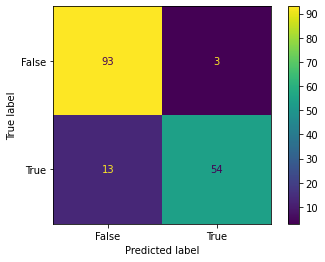

In [31]:
confusion_matrix = metrics.confusion_matrix(y_test, dt_pred_test)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

## AUC-ROC Curve

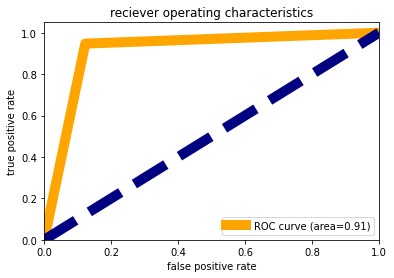

In [33]:
fpr,tpr,thresholds=roc_curve(dt_pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='orange',lw=10,label="ROC curve (area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("reciever operating characteristics")
plt.legend(loc="lower right")
plt.show()

## Classification Report

In [34]:
print(classification_report(y_test, dt_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        96
           1       0.95      0.81      0.87        67

    accuracy                           0.90       163
   macro avg       0.91      0.89      0.90       163
weighted avg       0.91      0.90      0.90       163



## Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
max_ac=0
randomState=0

for i in range(40):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.25)
    rf.fit(x_train,y_train)
    pred_train=rf.predict(x_train)
    pred_test=rf.predict(x_test)
    
    print("\n\nAt random state:",i)
    print("\nTrain Accuracy- ",round(accuracy_score(y_train,pred_train)*100,1))
    print("\nTest Accuracy- ",round(accuracy_score(y_test,pred_test)*100,1))
        
print("\n\n Best accuracy at random state-",randomState)



At random state: 0

Train Accuracy-  100.0

Test Accuracy-  93.1


At random state: 1

Train Accuracy-  100.0

Test Accuracy-  88.2


At random state: 2

Train Accuracy-  100.0

Test Accuracy-  93.1


At random state: 3

Train Accuracy-  100.0

Test Accuracy-  91.2


At random state: 4

Train Accuracy-  100.0

Test Accuracy-  92.2


At random state: 5

Train Accuracy-  100.0

Test Accuracy-  91.7


At random state: 6

Train Accuracy-  100.0

Test Accuracy-  90.7


At random state: 7

Train Accuracy-  100.0

Test Accuracy-  91.7


At random state: 8

Train Accuracy-  100.0

Test Accuracy-  90.2


At random state: 9

Train Accuracy-  100.0

Test Accuracy-  92.2


At random state: 10

Train Accuracy-  100.0

Test Accuracy-  92.2


At random state: 11

Train Accuracy-  100.0

Test Accuracy-  87.7


At random state: 12

Train Accuracy-  100.0

Test Accuracy-  88.2


At random state: 13

Train Accuracy-  100.0

Test Accuracy-  88.7


At random state: 14

Train Accuracy-  100.0

Test Accura

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.20)
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred_train=rf.predict(x_train)
pred_test=rf.predict(x_test)
rf_train_acc=round(accuracy_score(y_train,pred_train)*100,1)
rf_test_acc=round(accuracy_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",rf_train_acc)
print("\nTest Accuracy- ",rf_test_acc)


Train Accuracy-  100.0

Test Accuracy-  93.3


## Cross Validation Score

In [37]:
for i in range(15,30):
    cv_score=cross_val_score(rf,x,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",rf_test_acc)



At cv- 15

 cross validation score is- 82.71829405162738

 Accuracy score is- 93.3


At cv- 16

 cross validation score is- 81.7892156862745

 Accuracy score is- 93.3


At cv- 17

 cross validation score is- 83.63579474342929

 Accuracy score is- 93.3


At cv- 18

 cross validation score is- 84.44981213097155

 Accuracy score is- 93.3


At cv- 19

 cross validation score is- 85.23926094305531

 Accuracy score is- 93.3


At cv- 20

 cross validation score is- 85.02134146341461

 Accuracy score is- 93.3


At cv- 21

 cross validation score is- 86.86459739091316

 Accuracy score is- 93.3


At cv- 22

 cross validation score is- 86.97788697788698

 Accuracy score is- 93.3


At cv- 23

 cross validation score is- 88.50586611456177

 Accuracy score is- 93.3


At cv- 24

 cross validation score is- 88.31699346405229

 Accuracy score is- 93.3


At cv- 25

 cross validation score is- 88.74242424242425

 Accuracy score is- 93.3


At cv- 26

 cross validation score is- 89.00821960297766

 Accur

So we are getting the least difference between cross_val_score and accuracy score at cv=29

In [38]:
cv_score_best_rf=cross_val_score(rf,x,y,cv=29).mean()*100
print("cross validation score is-",cv_score_best_rf)
print("accuracy score for random forest classifier model is-",rf_test_acc)

cross validation score is- 90.0755902836759
accuracy score for random forest classifier model is- 93.3


## Confusion Matrix

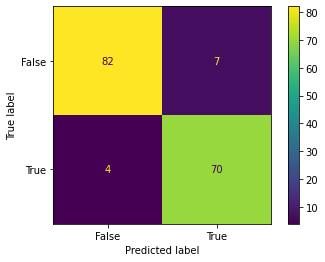

In [39]:
confusion_matrix = metrics.confusion_matrix(y_test, pred_test)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

## AUC-ROC Curve

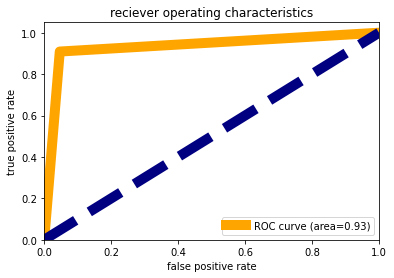

In [40]:
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='orange',lw=10,label="ROC curve (area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("reciever operating characteristics")
plt.legend(loc="lower right")
plt.show()

## Classification Report

In [41]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94        89
           1       0.91      0.95      0.93        74

    accuracy                           0.93       163
   macro avg       0.93      0.93      0.93       163
weighted avg       0.93      0.93      0.93       163



## Knn Classifier

In [42]:
from sklearn.neighbors import KNeighborsClassifier
max_ac=0
randomState=0
knn=KNeighborsClassifier()
for i in range(40):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.25)
    knn.fit(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    
    print("\n\nAt random state:",i)
    print("\nTrain Accuracy- ",round(accuracy_score(y_train,pred_train)*100,1))
    print("\nTest Accuracy- ",round(accuracy_score(y_test,pred_test)*100,1))
        
print("\n\n Best accuracy at random state-",randomState)



At random state: 0

Train Accuracy-  83.4

Test Accuracy-  82.4


At random state: 1

Train Accuracy-  83.6

Test Accuracy-  71.1


At random state: 2

Train Accuracy-  82.6

Test Accuracy-  75.5


At random state: 3

Train Accuracy-  85.4

Test Accuracy-  74.5


At random state: 4

Train Accuracy-  83.9

Test Accuracy-  74.5


At random state: 5

Train Accuracy-  84.1

Test Accuracy-  76.5


At random state: 6

Train Accuracy-  84.1

Test Accuracy-  69.6


At random state: 7

Train Accuracy-  81.8

Test Accuracy-  78.4


At random state: 8

Train Accuracy-  83.1

Test Accuracy-  73.0


At random state: 9

Train Accuracy-  82.6

Test Accuracy-  75.5


At random state: 10

Train Accuracy-  86.2

Test Accuracy-  71.1


At random state: 11

Train Accuracy-  86.2

Test Accuracy-  74.5


At random state: 12

Train Accuracy-  82.5

Test Accuracy-  73.0


At random state: 13

Train Accuracy-  84.3

Test Accuracy-  75.5


At random state: 14

Train Accuracy-  83.4

Test Accuracy-  74.0


At 

In [49]:
knn=KNeighborsClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.20)
knn.fit(x_train,y_train)
pred_train=knn.predict(x_train)
pred_test=knn.predict(x_test)
knn_train_acc=round(accuracy_score(y_train,pred_train)*100,1)
knn_test_acc=round(accuracy_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",knn_train_acc)
print("\nTest Accuracy- ",knn_test_acc)


Train Accuracy-  84.8

Test Accuracy-  79.1


## Cross Validation score

In [50]:
for i in range(4,15):
    cv_score=cross_val_score(knn,x,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",knn_test_acc)



At cv- 4

 cross validation score is- 70.27069448469042

 Accuracy score is- 79.1


At cv- 5

 cross validation score is- 73.45451791259562

 Accuracy score is- 79.1


At cv- 6

 cross validation score is- 73.70098039215685

 Accuracy score is- 79.1


At cv- 7

 cross validation score is- 73.95688602585155

 Accuracy score is- 79.1


At cv- 8

 cross validation score is- 73.33284799068143

 Accuracy score is- 79.1


At cv- 9

 cross validation score is- 74.31691765025099

 Accuracy score is- 79.1


At cv- 10

 cross validation score is- 73.58476362541404

 Accuracy score is- 79.1


At cv- 11

 cross validation score is- 74.44717444717445

 Accuracy score is- 79.1


At cv- 12

 cross validation score is- 74.43664032777289

 Accuracy score is- 79.1


At cv- 13

 cross validation score is- 74.92811847650557

 Accuracy score is- 79.1


At cv- 14

 cross validation score is- 75.43416548384404

 Accuracy score is- 79.1


So we are getting the least difference between cross_val_score and accuracy score at cv=14

In [51]:
cv_score_best_knn=cross_val_score(knn,x,y,cv=14).mean()*100
print("cross validation score is-",cv_score_best_knn)
print("accuracy score for Knn classifier model is-",knn_test_acc)

cross validation score is- 75.43416548384404
accuracy score for Knn classifier model is- 79.1


## Confusion Matrix

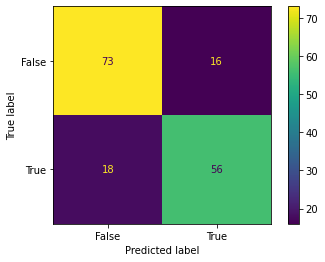

In [52]:
confusion_matrix = metrics.confusion_matrix(y_test, pred_test)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

## AUC-ROC Curve

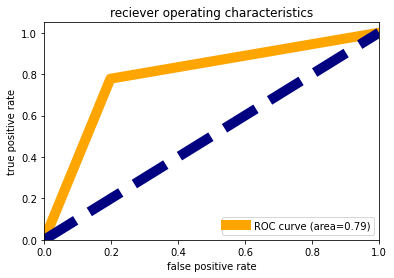

In [53]:
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='orange',lw=10,label="ROC curve (area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("reciever operating characteristics")
plt.legend(loc="lower right")
plt.show()

## Classification Report

In [54]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81        89
           1       0.78      0.76      0.77        74

    accuracy                           0.79       163
   macro avg       0.79      0.79      0.79       163
weighted avg       0.79      0.79      0.79       163



## XGBoost Classifier

In [55]:
from xgboost import XGBClassifier
xgmod=XGBClassifier()
for i in range(40):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.25)
    xgmod.fit(x_train,y_train)
    pred_train=xgmod.predict(x_train)
    pred_test=xgmod.predict(x_test)
    xg_train_acc=round(accuracy_score(y_train,pred_train)*100,1)
    xg_test_acc=round(accuracy_score(y_test,pred_test)*100,1)
    print("\n at random state-",i)
    print("\nTrain Accuracy- ",xg_train_acc)
    print("\nTest Accuracy- ",xg_test_acc)


 at random state- 0

Train Accuracy-  100.0

Test Accuracy-  86.3

 at random state- 1

Train Accuracy-  100.0

Test Accuracy-  91.7

 at random state- 2

Train Accuracy-  100.0

Test Accuracy-  91.2

 at random state- 3

Train Accuracy-  100.0

Test Accuracy-  89.7

 at random state- 4

Train Accuracy-  100.0

Test Accuracy-  87.7

 at random state- 5

Train Accuracy-  100.0

Test Accuracy-  85.3

 at random state- 6

Train Accuracy-  100.0

Test Accuracy-  87.7

 at random state- 7

Train Accuracy-  100.0

Test Accuracy-  89.2

 at random state- 8

Train Accuracy-  100.0

Test Accuracy-  90.2

 at random state- 9

Train Accuracy-  100.0

Test Accuracy-  89.7

 at random state- 10

Train Accuracy-  100.0

Test Accuracy-  87.7

 at random state- 11

Train Accuracy-  100.0

Test Accuracy-  86.3

 at random state- 12

Train Accuracy-  100.0

Test Accuracy-  87.7

 at random state- 13

Train Accuracy-  100.0

Test Accuracy-  84.3

 at random state- 14

Train Accuracy-  100.0

Test Accura

In [57]:
xgmod=XGBClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=38,test_size=0.20)
xgmod.fit(x_train,y_train)
pred_train=xgmod.predict(x_train)
pred_test=xgmod.predict(x_test)
xg_train_acc=round(accuracy_score(y_train,pred_train)*100,1)
xg_test_acc=round(accuracy_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",xg_train_acc)
print("\nTest Accuracy- ",xg_test_acc)


Train Accuracy-  100.0

Test Accuracy-  94.5


## Cross Validation Report

In [58]:
for i in range(40,70):
    cv_score=cross_val_score(xgmod,x,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",xg_test_acc)



At cv- 40

 cross validation score is- 85.44642857142858

 Accuracy score is- 94.5


At cv- 41

 cross validation score is- 85.87291399229781

 Accuracy score is- 94.5


At cv- 42

 cross validation score is- 86.54761904761905

 Accuracy score is- 94.5


At cv- 43

 cross validation score is- 86.7265061879505

 Accuracy score is- 94.5


At cv- 44

 cross validation score is- 86.31047315257841

 Accuracy score is- 94.5


At cv- 45

 cross validation score is- 87.35542560103964

 Accuracy score is- 94.5


At cv- 46

 cross validation score is- 86.99914748508098

 Accuracy score is- 94.5


At cv- 47

 cross validation score is- 86.99763593380614

 Accuracy score is- 94.5


At cv- 48

 cross validation score is- 86.73406862745098

 Accuracy score is- 94.5


At cv- 49

 cross validation score is- 87.0048019207683

 Accuracy score is- 94.5


At cv- 50

 cross validation score is- 87.63970588235293

 Accuracy score is- 94.5


At cv- 51

 cross validation score is- 88.45588235294117

 Accura

So we are getting the least difference between cross_val_score and accuracy score at cv=65

In [59]:
cv_score_best_xg=cross_val_score(xgmod,x,y,cv=65).mean()*100
print("cross validation score is-",cv_score_best_xg)
print("accuracy score for Knn classifier model is-",xg_test_acc)

cross validation score is- 89.58579881656806
accuracy score for Knn classifier model is- 94.5


## Confusion Matrix

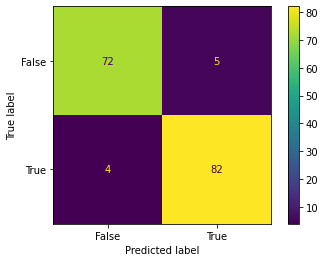

In [60]:
confusion_matrix = metrics.confusion_matrix(y_test, pred_test)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

## AUC-ROC Curve

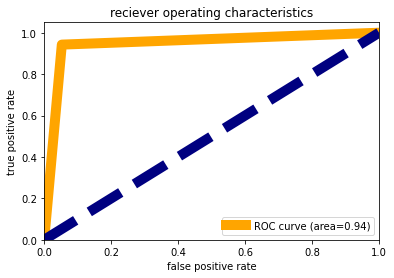

In [61]:
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='orange',lw=10,label="ROC curve (area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("reciever operating characteristics")
plt.legend(loc="lower right")
plt.show()

## Classification Report

In [62]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94        77
           1       0.94      0.95      0.95        86

    accuracy                           0.94       163
   macro avg       0.94      0.94      0.94       163
weighted avg       0.94      0.94      0.94       163



## Model Summary

In [63]:
models=['Logistic Regression','Decision Tree Classifier','Knn Classifier','Random Forest Classifier','XGBoost']
test_acc=[test_accuracy,dt_acc_test,knn_test_acc,rf_test_acc,xg_test_acc]
cv_score=[cv_score_best,cv_score_best_dt,cv_score_best_knn,cv_score_best_rf,cv_score_best_xg]
dfm=pd.DataFrame(list(zip(models,test_acc,cv_score)),columns=['Models','Test Accuracy','CV Score'])
dfm

,Models,Test Accuracy,CV Score
0,Logistic Regression,76.1,69.170018
1,Decision Tree Classifier,90.2,86.595912
2,Knn Classifier,79.1,75.434165
3,Random Forest Classifier,93.3,90.075590
4,XGBoost,94.5,89.585799


We will finalize Random Forest classifier as our model because it is giving best accuracy and there is least difference between accuracy score and cv score, the area under AUC-ROC Curve is also highest among all other models and its classification report is better then others. So lets try to improve its accuracy by performing hyperparameter tuning on it.

## Hyperparameter tuning on Random Forest Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'bootstrap': [True, False],
 'max_depth': [40, 50, 60],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600] 
}

rf_reg = RandomForestClassifier()

rf_reg_tuned = GridSearchCV(estimator=rf_reg,
                            param_grid=param_grid,
                            cv=3,
                            n_jobs=-1,
                            verbose=2)

rf_reg_tuned.fit(x_train, y_train)
rf_reg_tuned.best_estimator_

Fitting 3 folds for each of 162 candidates, totalling 486 fits


RandomForestClassifier(bootstrap=False, max_depth=40, min_samples_split=5,
                       n_estimators=600)

In [65]:
rf1=RandomForestClassifier(n_estimators=600,max_depth=40,bootstrap=False,min_samples_split=5)
rf1.fit(x_train,y_train)
pred_train=rf1.predict(x_train)
pred_test=rf1.predict(x_test)
train_acc=round(accuracy_score(y_train,pred_train)*100,1)
test_acc=round(accuracy_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",train_acc)
print("\nTest Accuracy- ",test_acc)


Train Accuracy-  100.0

Test Accuracy-  95.1


## Conclusion

After performing hyperparameter tuning on Random Forest classifier we found that accuracy increased by 2% to 95% so we would save this tunned model.

## Model Saving

In [ ]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(rf1, open(filename, 'wb'))